In [65]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import sem

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [3]:
# Combine the data into a single dataset
Combined_dataset = mouse_metadata.merge(study_results, on='Mouse ID')
# Display the data table for preview
Combined_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
Total_mice = len(Combined_dataset["Mouse ID"].value_counts())
Total_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
Duplicate_data_mouseID = Combined_dataset[Combined_dataset.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
Duplicate_data_mouseID

array(['g989'], dtype=object)

In [6]:
# # Optional: Get all the data for the duplicate mouse ID. 
Duplicate_data_mouseID = Combined_dataset[Combined_dataset.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
Duplicate_data_mouseID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# (clean_df['Mouse ID'] != 'g989')

In [8]:
#  Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df = Combined_dataset.drop_duplicates(subset = ['Mouse ID'], keep='first')
clean_df = Combined_dataset.loc[Combined_dataset['Mouse ID'] != 'g989', :]
clean_df = clean_df.sort_values('Drug Regimen')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
347,v923,Capomulin,Female,19,21,30,40.752216,2
358,g316,Capomulin,Female,22,22,35,44.702833,2
357,g316,Capomulin,Female,22,22,30,44.221480,2
356,g316,Capomulin,Female,22,22,25,46.809225,1
355,g316,Capomulin,Female,22,22,20,45.933322,1
...,...,...,...,...,...,...,...,...
1324,o926,Zoniferol,Male,15,29,40,59.903044,3
1323,o926,Zoniferol,Male,15,29,35,58.593993,3
1322,o926,Zoniferol,Male,15,29,30,56.917398,3
591,b313,Zoniferol,Male,12,27,15,49.188387,1


In [9]:
# Checking the number of mice in the clean DataFrame.
Total_mice_clean_df = len(clean_df["Mouse ID"].unique())
Total_mice_clean_df

248

# Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Mean_Tumor_Volume = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Mean_Tumor_Volume
Median_Tumor_Volume = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Median_Tumor_Volume
Tumor_Volume_Variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Tumor_Volume_Variance 
Tumor_Volume_Std_Dev = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Tumor_Volume_Std_Dev
Tumor_Volume_Std_Err = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
Tumor_Volume_Std_Err

summary_dataframe = pd.DataFrame({"Mean Tumor Volume" : Mean_Tumor_Volume, "Median Tumor Volume" : Median_Tumor_Volume,
                    "Tumor Volume Variance" : Tumor_Volume_Variance, "Tumor Volume Std. Dev." : Tumor_Volume_Std_Dev, 
                    "Tumor Volume Std. Err." : Tumor_Volume_Std_Err})
summary_dataframe

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summary_drug_al = clean_df.groupby('Drug Regimen').aggregate({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})
summary_drug_al

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

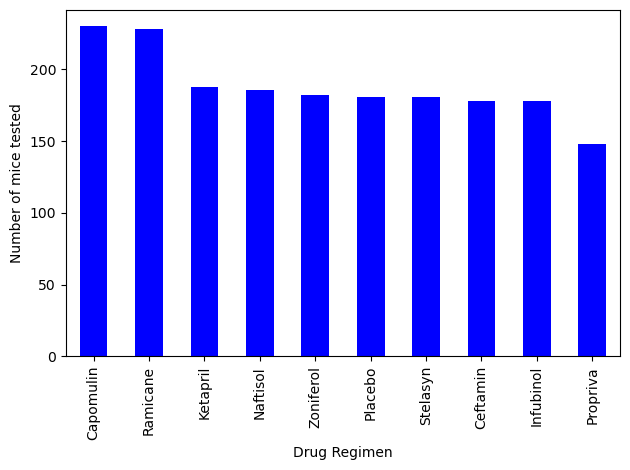

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
Bar_plot_panda = clean_df.groupby("Drug Regimen")["Timepoint"].count()
Bar_plot_panda = Bar_plot_panda.sort_values(ascending=False)
Panda_plot = Bar_plot_panda.plot(kind='bar', color='b', align='center', ylabel="Number of mice tested", xlabel="Drug Regimen")
plt.tight_layout()
plt.show()

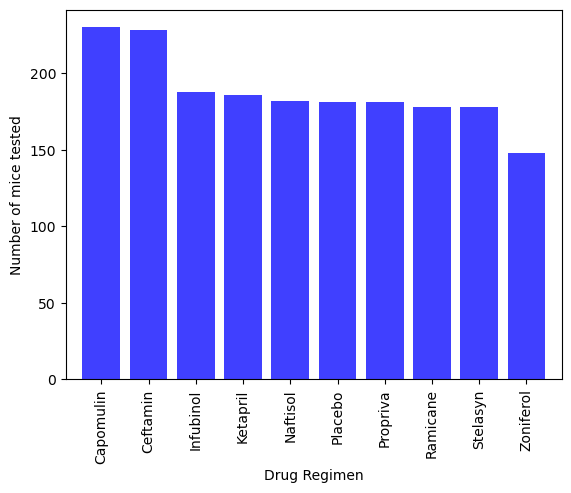

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
x_axis = clean_df["Drug Regimen"].value_counts()
y_axis = clean_df.groupby("Drug Regimen")["Timepoint"].count()
y_axis = y_axis.sort_values(ascending=False)
tick_names = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
x_axis = np.arange(0, len(x_axis), 1)
tick_locations = [_ for _ in x_axis]
plt.bar(x_axis, y_axis, facecolor='blue', alpha=0.75, align='center')
plt.xticks(tick_locations, tick_names, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")
plt.xlim(-0.75, len(tick_names)-.25)
plt.show()

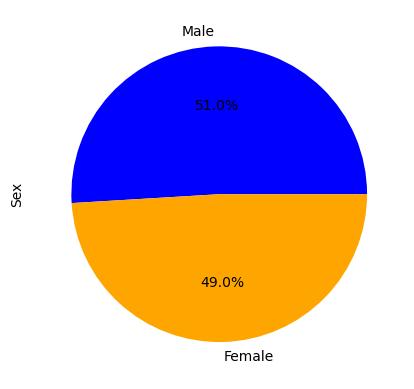

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df1 = clean_df["Sex"].value_counts()
colors = ["blue", "orange"]
df1.plot(kind='pie', colors=colors, startangle=0, autopct='%1.1f%%')
plt.show()

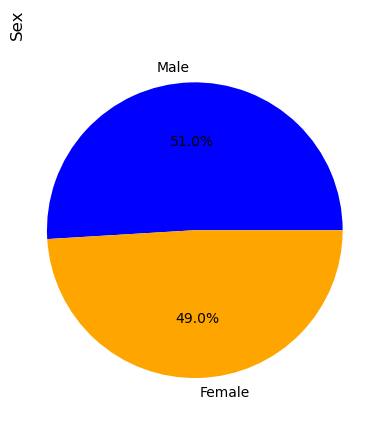

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y_axis = clean_df["Sex"].value_counts()
y_axis
sex = ["Male", "Female"]
colors = ["blue", "orange"]
plt.pie(y_axis, labels=sex, colors=colors, startangle=0, autopct='%1.1f%%')
plt.title('Sex', rotation = 90, loc='left')
plt.show()

# Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse 
Tumor_volume = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
Tumor_volume.reset_index()
Tumor_volume

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [17]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_dataset = clean_df.merge(Tumor_volume, on=['Mouse ID', 'Timepoint'], how='left')
# # Display the data table for preview
new_dataset.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [18]:
df1 = pd.DataFrame(new_dataset.loc[((new_dataset["Drug Regimen"] == 'Capomulin') | (new_dataset["Drug Regimen"] == 'Ramicane') | (new_dataset["Drug Regimen"] == 'Infubinol')|(new_dataset["Drug Regimen"] == 'Ceftamin')),:])
df1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,v923,Capomulin,Female,19,21,30,40.752216,2
1,g316,Capomulin,Female,22,22,35,44.702833,2
2,g316,Capomulin,Female,22,22,30,44.221480,2
3,g316,Capomulin,Female,22,22,25,46.809225,1
4,g316,Capomulin,Female,22,22,20,45.933322,1
...,...,...,...,...,...,...,...,...
1512,d251,Ramicane,Female,8,19,5,41.746355,1
1513,d251,Ramicane,Female,8,19,10,42.432258,1
1514,c758,Ramicane,Male,9,17,5,45.578678,0
1515,j913,Ramicane,Female,4,17,35,35.170148,0


In [27]:
# Dataframe required for plotting and Calculations
Final_df = df1.loc[:, ['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
Final_df.reset_index()
Final_df

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,v923,Capomulin,40.752216
1,g316,Capomulin,44.702833
2,g316,Capomulin,44.221480
3,g316,Capomulin,46.809225
4,g316,Capomulin,45.933322
...,...,...,...
1512,d251,Ramicane,41.746355
1513,d251,Ramicane,42.432258
1514,c758,Ramicane,45.578678
1515,j913,Ramicane,35.170148


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
x_axis = Final_df['Drug Regimen'].unique()
x_axis
tick_names = [value for values in x_axis]
# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol_data = []

NameError: name 'value' is not defined

In [53]:
# # Calculate the IQR and quantitatively determine if there are any potential outliers.
Tumor_Volume = Final_df['Tumor Volume (mm3)']
st.normaltest(Tumor_Volume)

NormaltestResult(statistic=21.268665681250457, pvalue=2.4075090513860803e-05)

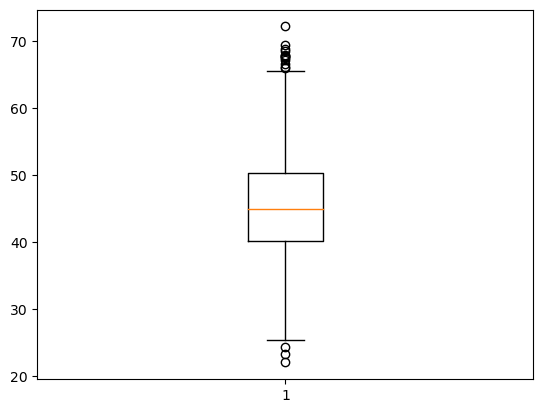

In [54]:
fig, ax = plt.subplots()
ax.boxplot(Tumor_Volume)
plt.show()

In [55]:
Tumor_Volume.quantile([0.25, 0.5, 0.75])
qr3 = Tumor_Volume.quantile([0.75])[0.75]
qr1 = Tumor_Volume.quantile([0.25])[0.25]
iqr = qr3-qr1
lowerbound = qr1-iqr
upperbound = qr3+iqr
print(iqr, lowerbound, upperbound)

10.136299842500009 30.083870944999987 60.49277047250001


In [71]:
print(np.mean(Final_df['Tumor Volume (mm3)']), st.mode(Final_df['Tumor Volume (mm3)']))

45.82255583425062 ModeResult(mode=array([45.]), count=array([100]))


C:\Users\panka\AppData\Local\Temp\ipykernel_29628\2563207362.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(np.mean(Final_df['Tumor Volume (mm3)']), st.mode(Final_df['Tumor Volume (mm3)']))


In [72]:
# Locate the rows which contain mice on each drug and get the tumor volumes 
# add subset 
subset = Final_df.sample(100)
print(np.mean(subset['Tumor Volume (mm3)']), st.mode(subset['Tumor Volume (mm3)']))
print(sem(subset['Tumor Volume (mm3)']))

44.4990815061 ModeResult(mode=array([45.]), count=array([10]))
0.809921676234471


C:\Users\panka\AppData\Local\Temp\ipykernel_29628\2934658037.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(np.mean(subset['Tumor Volume (mm3)']), st.mode(subset['Tumor Volume (mm3)']))


In [79]:
# Determine outliers using upper and lower bounds
quantiles = Final_df['Tumor Volume (mm3)'].quantile([0.25, 0.75])
iqr = quantiles[0.75] - quantiles[0.25]
lowerbound = quantiles[0.25] - iqr 
upperbound = quantiles[0.75] + iqr
outlier_tumor_vol = Final_df.loc[(Final_df['Tumor Volume (mm3)'] < lowerbound) | (Final_df['Tumor Volume (mm3)'] > upperbound), :]
outlier_tumor_vol.head()
# Outliers series
Capomulin_potential_outliers = outlier_tumor_vol.loc[outlier_tumor_vol['Drug Regimen'] == 'Capomulin', :]
Capomulin_potential_outliers = Capomulin_potential_outliers["Tumor Volume (mm3)"]
Capomulin_potential_outliers
Infubinol_potential_outliers = outlier_tumor_vol.loc[outlier_tumor_vol['Drug Regimen'] == 'Infubinol', :]
Infubinol_potential_outliers = Infubinol_potential_outliers["Tumor Volume (mm3)"]
Infubinol_potential_outliers
Ramicane_potential_outliers = outlier_tumor_vol.loc[outlier_tumor_vol['Drug Regimen'] == 'Ramicane', :]
Ramicane_potential_outliers = Ramicane_potential_outliers["Tumor Volume (mm3)"]
Ramicane_potential_outliers
Ceftamin_potential_outliers = outlier_tumor_vol.loc[outlier_tumor_vol['Drug Regimen'] == 'Ceftamin', :]
Ceftamin_potential_outliers = Ceftamin_potential_outliers["Tumor Volume (mm3)"]
Ceftamin_potential_outliers

237    62.999356
239    67.527482
240    62.187950
244    60.921539
264    64.299830
285    63.430632
286    61.071949
297    61.433892
298    64.251028
306    64.192341
307    68.923185
308    66.622836
309    63.329330
311    61.386660
315    68.594745
325    61.405999
326    63.844858
335    67.748662
337    64.729837
338    63.469549
339    61.153140
368    61.849023
406    64.634949
Name: Tumor Volume (mm3), dtype: float64

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

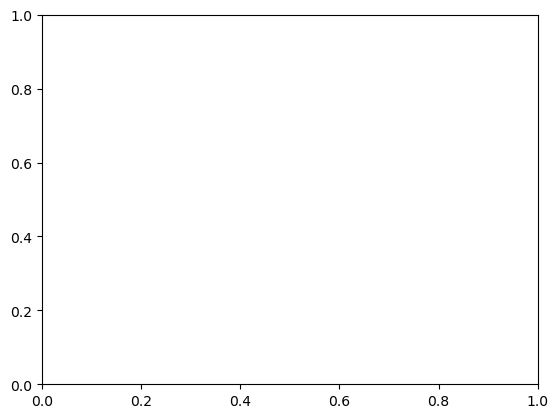

In [59]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(Tumor Volume (mm3)")
plt.show()

# Line and Scatter Plots

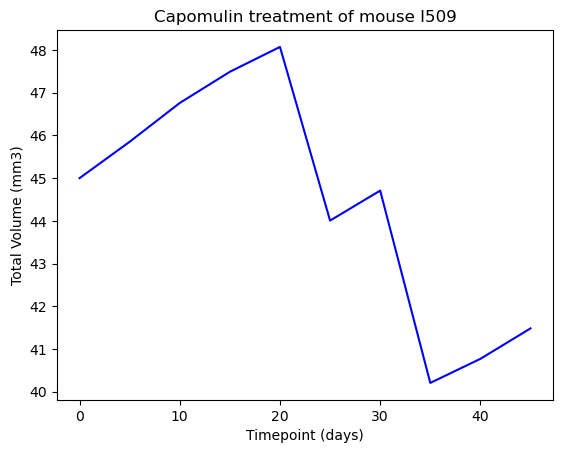

In [112]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df2 = df1.loc[(df1['Drug Regimen'] == 'Capomulin') & (df1['Mouse ID'] == 'l509'), :]
df2 = df2.sort_values(['Timepoint'], ascending = True)
df2
plt.plot(df2['Timepoint'], df2['Tumor Volume (mm3)'], color='blue')
plt.xlabel("Timepoint (days)")
plt.ylabel("Total Volume (mm3)")
plt.title("Capomulin treatment of mouse I509")
plt.show()

ValueError: x and y must be the same size

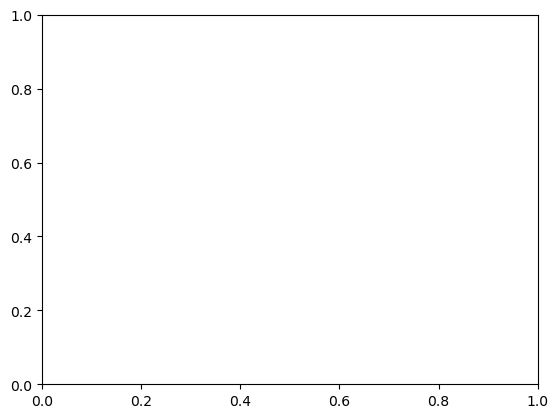

In [135]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df3 = df1.loc[(df1['Drug Regimen'] == 'Capomulin'), :]
df4 = df3.sort_values(['Weight (g)'], ascending = True)
x_axis = df4['Weight (g)'].unique()
x_axis
y_axis = df4['Tumor Volume (mm3)']
y_axis
plt.scatter(x_axis, y_axis, marker='^', color='red')
# # plt.title("Running Time of FakeSort for Sample Input Sizes")
# # plt.xlabel("Length of Input Array")
# # plt.ylabel("Time to Sort (s)")
plt.show()